In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("B0006.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


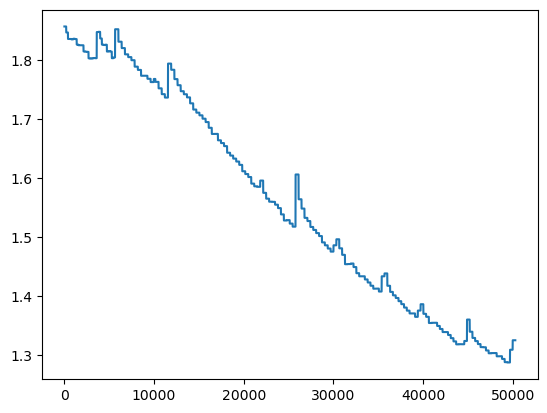

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [5]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.856487
2,1.856487
3,1.856487
4,1.856487
...,...
50280,1.325079
50281,1.325079
50282,1.325079
50283,1.325079


In [6]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

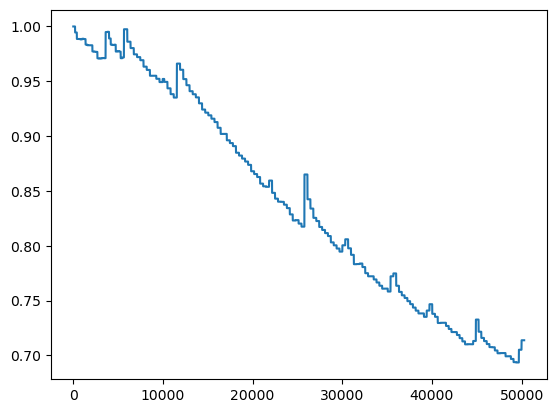

In [7]:
plt.plot(range(len(soh)),soh)
plt.show()

In [315]:
capacity=np.asarray(capacity)

In [316]:
type(capacity)

numpy.ndarray

In [317]:
from sklearn.preprocessing import MinMaxScaler

In [392]:
# PREDICTING SOH

In [393]:
timestep = 50

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [394]:
from keras.models import Sequential

In [395]:
from keras.layers import Dense, LSTM, Flatten

In [396]:
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, mean_absolute_error,r2_score
from tensorflow.keras.layers import Dropout

In [397]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(50,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.3))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(8,activation='linear'))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

In [398]:
model.fit(Xtrain, Ytrain, epochs=10,batch_size=32)

Epoch 1/10
4/4 [==============================] - 3s 21ms/step - loss: 0.2208
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.1490
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0522
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0372
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0333
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0167
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0141
Epoch 8/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0158
Epoch 9/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0117
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0117


In [399]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [400]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [401]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

1567/1567 [==============================] - 12s 7ms/step


0.001548875618168199

In [402]:
from math import sqrt

In [403]:
sqrt(mean_squared_error(Ytest, preds))

0.039355757115931575

In [404]:
mean_absolute_error(Ytest,preds)

0.03316692026228187

In [405]:
r2_score(Ytest,preds)

0.8387130524450966

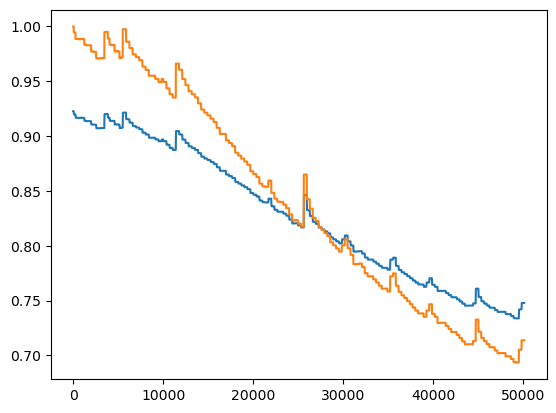

In [406]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [407]:
preds = model.predict(X)

1570/1570 [==============================] - 11s 7ms/step


In [408]:
preds

array([[0.9227392 ],
       [0.9227392 ],
       [0.9227392 ],
       ...,
       [0.74784017],
       [0.74784017],
       [0.74784017]], dtype=float32)

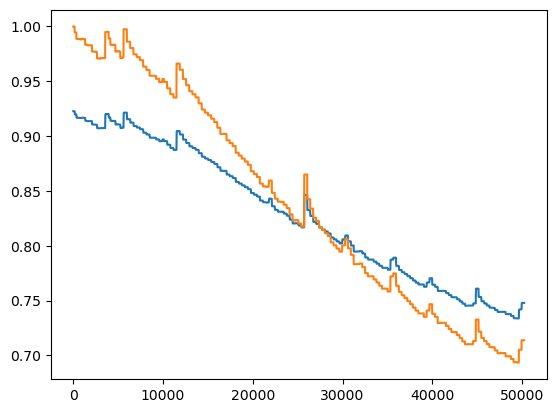

In [409]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

In [410]:
#PREDICTING CAPACITY

In [411]:
timestep = 50

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [412]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(50,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(8,activation='linear'))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

In [413]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 50, 32)            4352      
                                                                 
 dropout_60 (Dropout)        (None, 50, 32)            0         
                                                                 
 lstm_61 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_61 (Dropout)        (None, 32)                0         
                                                                 
 dense_120 (Dense)           (None, 64)                2112      
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 8)               

In [414]:
model.fit(Xtrain, Ytrain, epochs=10,batch_size=32)

Epoch 1/10
4/4 [==============================] - 3s 21ms/step - loss: 1.0873
Epoch 2/10
4/4 [==============================] - 0s 20ms/step - loss: 0.1684
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 0.2018
Epoch 4/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0424
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0610
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0531
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0271
Epoch 8/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0369
Epoch 9/10
4/4 [==============================] - 0s 19ms/step - loss: 0.0326
Epoch 10/10
4/4 [==============================] - 0s 20ms/step - loss: 0.0318


In [415]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [416]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

1567/1567 [==============================] - 12s 7ms/step


0.005318139568842014

In [417]:
sqrt(mean_squared_error(Ytest, preds))

0.07292557554686842

In [418]:
mean_absolute_error(Ytest,preds)

0.06336593113426761

In [419]:
r2_score(Ytest, preds)

0.8393212707544818

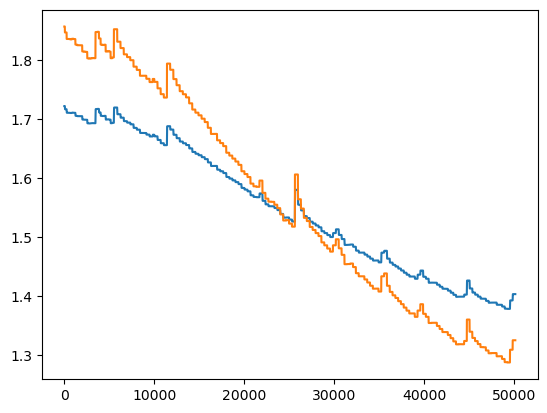

In [420]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [421]:
preds = model.predict(X)

1570/1570 [==============================] - 11s 7ms/step


In [422]:
preds

array([[1.7217436],
       [1.7217436],
       [1.7217436],
       ...,
       [1.4032217],
       [1.4032217],
       [1.4032217]], dtype=float32)

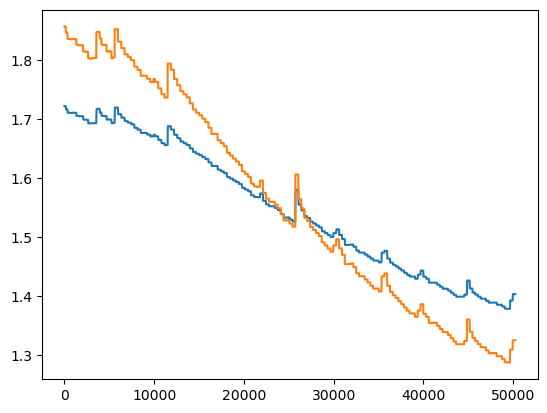

In [423]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)